# 2603655_DataAcquisition

## Week3 20240820

---
* Author:  [Yuttapong Mahasittiwat](mailto:khala1391@gmail.com)
* Technologist | Data Modeler | Data Analyst
* [YouTube](https://www.youtube.com/khala1391)
* [LinkedIn](https://www.linkedin.com/in/yuttapong-m/)
---

## lecture

### Missing Value Mechanism
- `MCAR (Missing Completely at Random)`: Missingness is unrelated to any data, observed or unobserved.
- `MAR (Missing at Random)`: Missingness is related to observed data, not the missing data itself. >> impute for this case
- `MNAR (Missing Not at Random)`: Missingness is related to the missing data itself. >>> unobserved variable i.e. human error

### SimpleImputer
- mean
- median
- Most Frequent

Pandas
- ffill
- bfill

## Import Data

In [11]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
print("pandas version :",pd.__version__)
print("numpy version :",np.__version__)
print("matplotlib version :",mpl.__version__)
print("seaborn version :",sns.__version__)

pandas version : 2.2.1
numpy version : 1.26.4
matplotlib version : 3.8.4
seaborn version : 0.13.2


In [12]:
df = pd.read_csv('data/traffic_data.csv',parse_dates=['datetime'],
                 # index_col=['datetime']
                )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        15000 non-null  datetime64[ns]
 1   road_name       15000 non-null  object        
 2   traffic_volume  14254 non-null  float64       
 3   average_speed   13826 non-null  float64       
 4   temperature     14003 non-null  float64       
 5   weather         15000 non-null  object        
 6   is_workday      15000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 717.9+ KB


In [13]:
df.head()

,datetime,road_name,traffic_volume,average_speed,temperature,weather,is_workday
0,2023-05-01 00:00:00,Oak Rd,551.0,32.991570,NaN,Rainy,True
1,2023-05-01 00:30:00,River Blvd,438.0,45.380384,25.907115,Sunny,True
2,2023-05-01 01:00:00,Park Ave,537.0,40.460358,21.948652,Rainy,True
3,2023-05-01 01:30:00,River Blvd,483.0,32.705099,33.529923,Sunny,True
4,2023-05-01 02:00:00,River Blvd,610.0,26.630187,24.584223,Rainy,False


In [14]:
df.head()

,datetime,road_name,traffic_volume,average_speed,temperature,weather,is_workday
0,2023-05-01 00:00:00,Oak Rd,551.0,32.991570,NaN,Rainy,True
1,2023-05-01 00:30:00,River Blvd,438.0,45.380384,25.907115,Sunny,True
2,2023-05-01 01:00:00,Park Ave,537.0,40.460358,21.948652,Rainy,True
3,2023-05-01 01:30:00,River Blvd,483.0,32.705099,33.529923,Sunny,True
4,2023-05-01 02:00:00,River Blvd,610.0,26.630187,24.584223,Rainy,False


In [15]:
df.isna().sum()

datetime             0
road_name            0
traffic_volume     746
average_speed     1174
temperature        997
weather              0
is_workday           0
dtype: int64

In [16]:
# split missing columns and non-missing columns
missing_columns = df.isna().sum().to_frame().loc[lambda x:x[0]>0].index.to_list()
non_missing_columns = [col for col in df.columns if col not in missing_columns]
non_missing_columns.remove('datetime')

In [17]:
missing_columns, non_missing_columns

(['traffic_volume', 'average_speed', 'temperature'],
 ['road_name', 'weather', 'is_workday'])

## Descriptive analysis

In [19]:
df_desc = df[missing_columns].describe().T
df_desc['skew'] = df[missing_columns].skew()
df_desc['kurtosis'] = df[missing_columns].kurtosis()
df_desc.T

,traffic_volume,average_speed,temperature
count,14254.000000,13826.000000,14003.000000
mean,500.182896,38.800919,25.057375
std,100.180866,9.357423,5.021333
min,93.000000,0.000000,6.902290
25%,432.000000,32.470267,21.653631
50%,500.000000,38.979766,25.087101
75%,569.000000,44.972720,28.446811
max,877.000000,82.988576,42.028219
skew,-0.010720,0.042789,-0.041460
kurtosis,-0.013665,0.219415,-0.044730


### analysis by categorical vars

In [21]:
df_list = list()
for col in non_missing_columns:
    for val in df[col].unique():
        df_desc = df[df[col]==val][missing_columns].skew().to_frame()
        df_desc.columns=['skew']
        df_desc['kurtosis'] = df[df[col]==val][missing_columns].kurtosis()
        df_desc = df_desc.T.reset_index()
        df_desc['Detail'] = f'{col.upper()} = {val}'
        df_list.append(df_desc)

In [22]:
df_desc=pd.concat(df_list)
df_desc.sort_values(by=['index','Detail']).reset_index(drop=True)

,index,traffic_volume,average_speed,temperature,Detail
0,kurtosis,-0.023960,0.112871,0.031329,IS_WORKDAY = False
1,kurtosis,-0.009999,0.264859,-0.077456,IS_WORKDAY = True
2,kurtosis,-0.024346,0.200347,-0.050095,ROAD_NAME = Broadway
3,kurtosis,-0.033530,0.436111,-0.047423,ROAD_NAME = Main St
4,kurtosis,-0.139493,0.046637,-0.061661,ROAD_NAME = Oak Rd
5,kurtosis,0.048180,0.355424,-0.027732,ROAD_NAME = Park Ave
6,kurtosis,0.086246,0.103245,-0.030907,ROAD_NAME = River Blvd
7,kurtosis,0.086326,0.253965,0.021516,WEATHER = Cloudy
8,kurtosis,-0.078501,0.117585,-0.154988,WEATHER = Rainy
9,kurtosis,-0.056521,0.295397,-0.018764,WEATHER = Sunny


### overall correlation

In [24]:
# overall
# if not covariate, freely impute
df[missing_columns].corr()

,traffic_volume,average_speed,temperature
traffic_volume,1.000000,0.009316,-0.006064
average_speed,0.009316,1.000000,-0.004193
temperature,-0.006064,-0.004193,1.000000


### correlation by categorical vars (constraint)

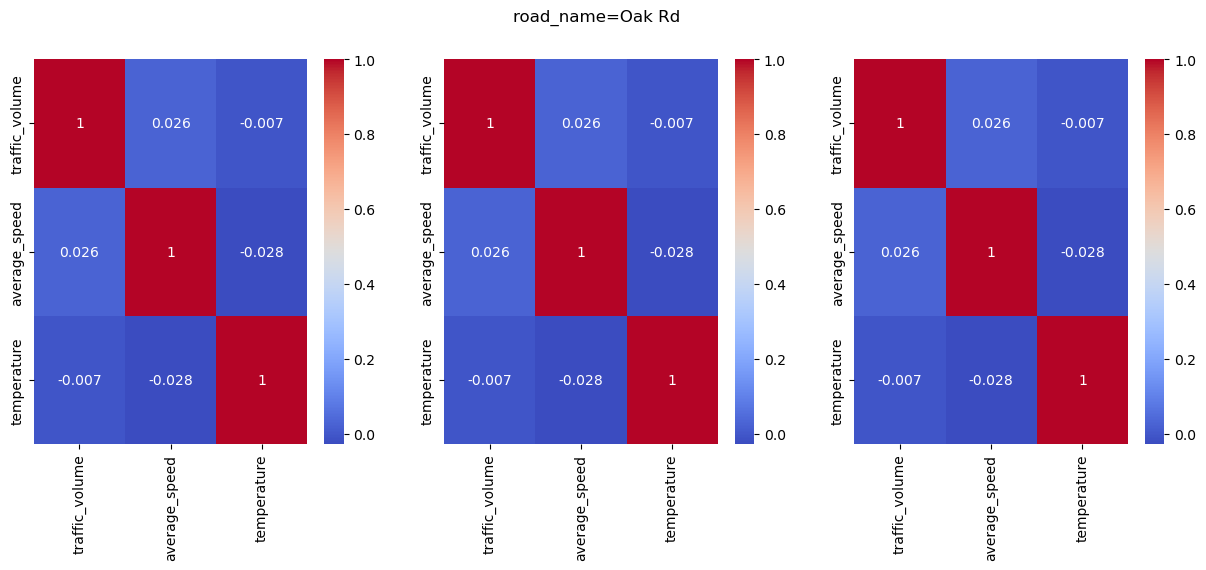

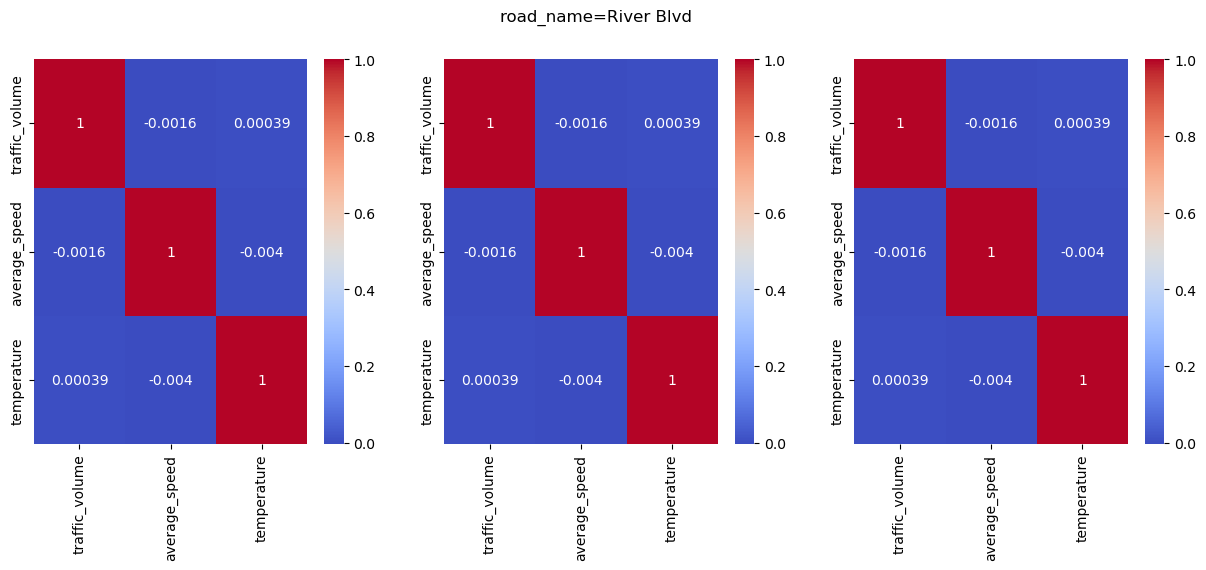

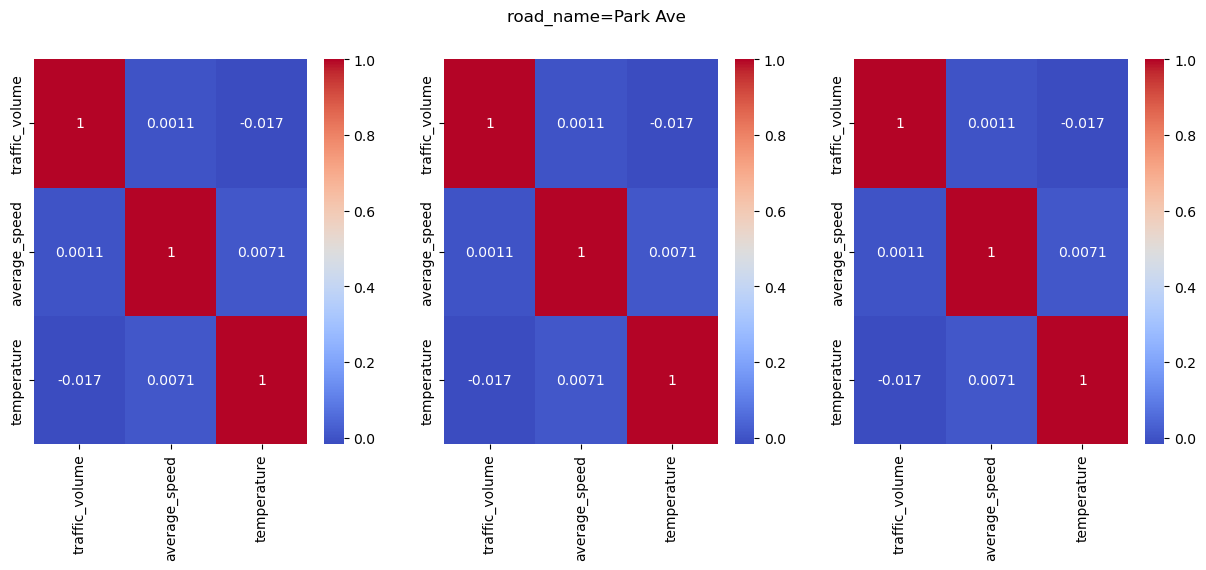

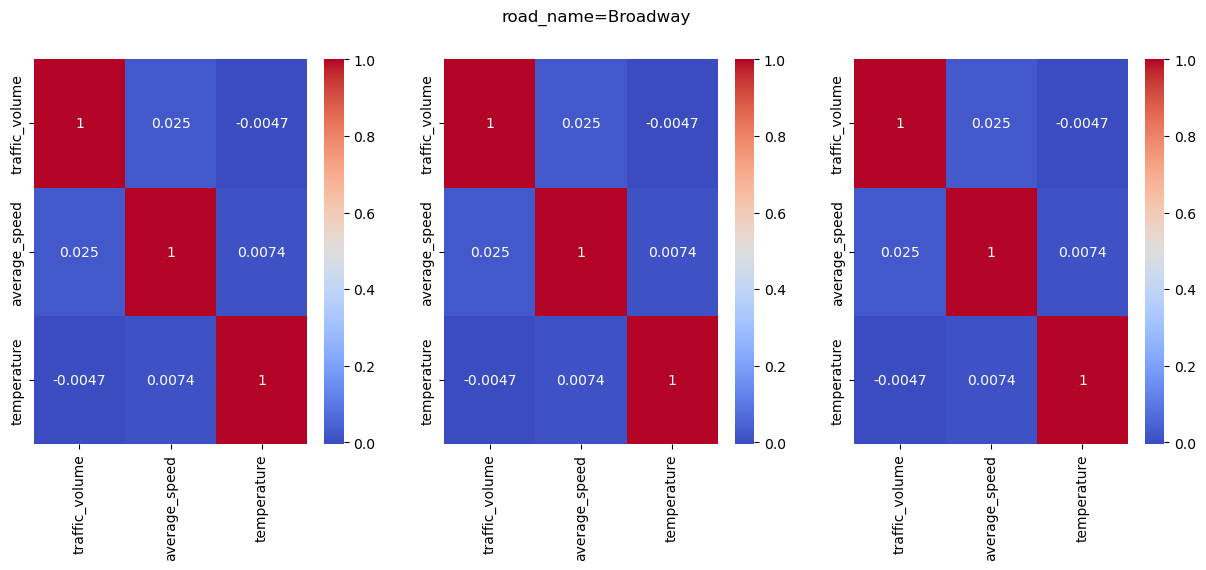

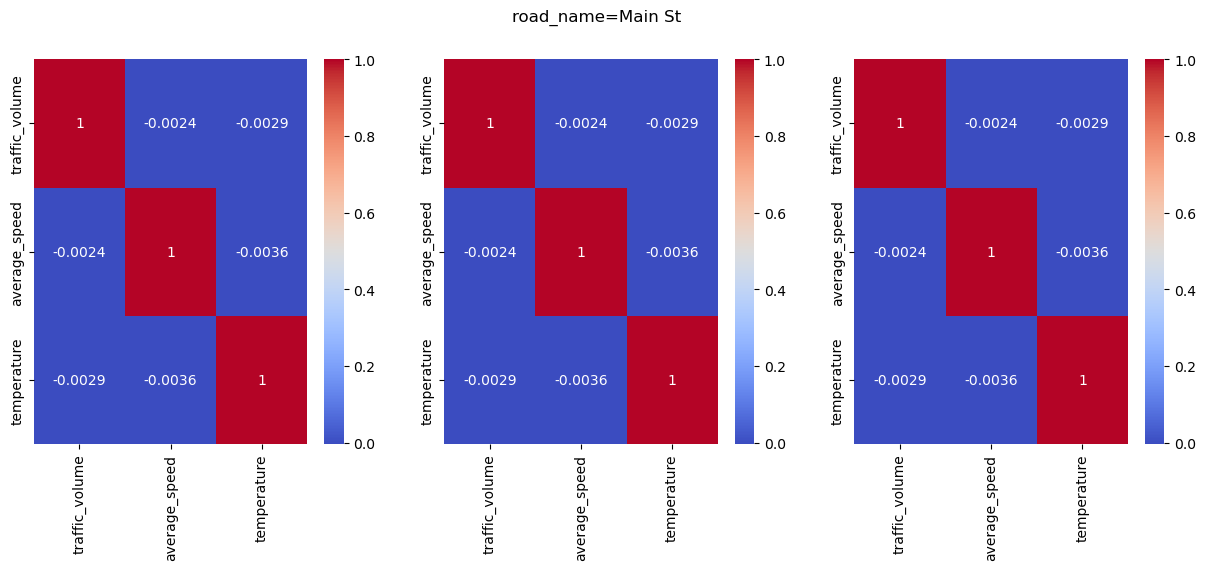

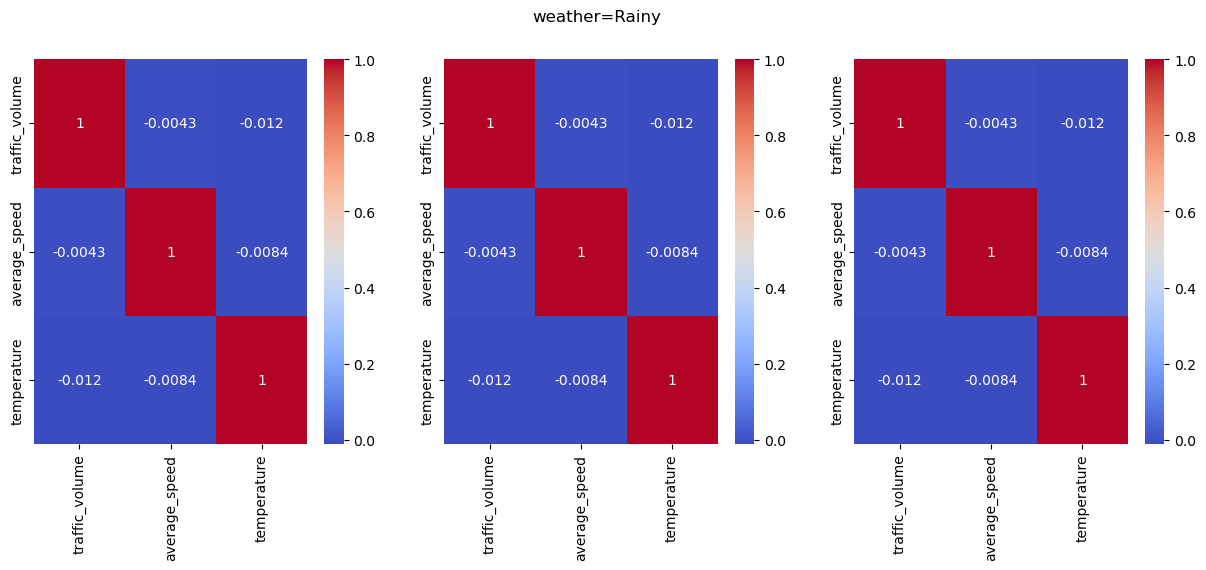

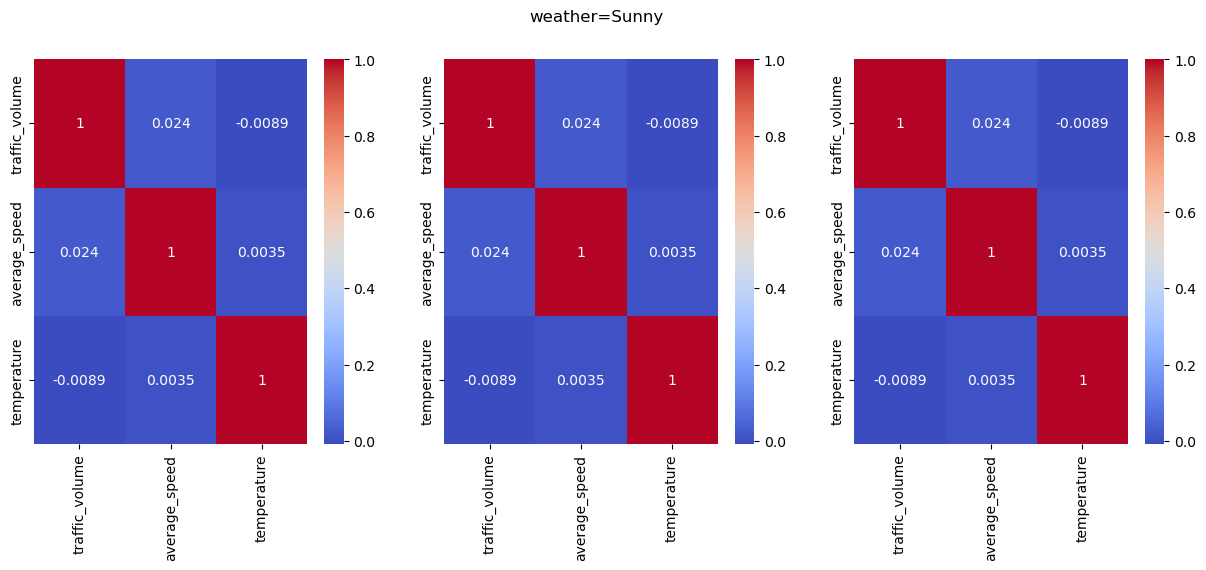

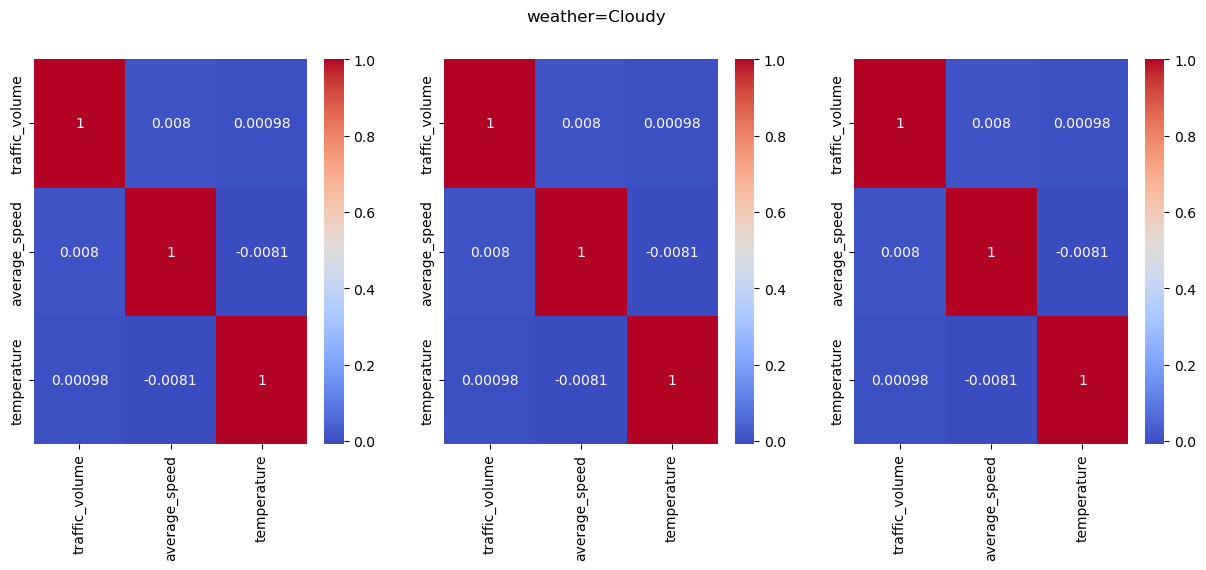

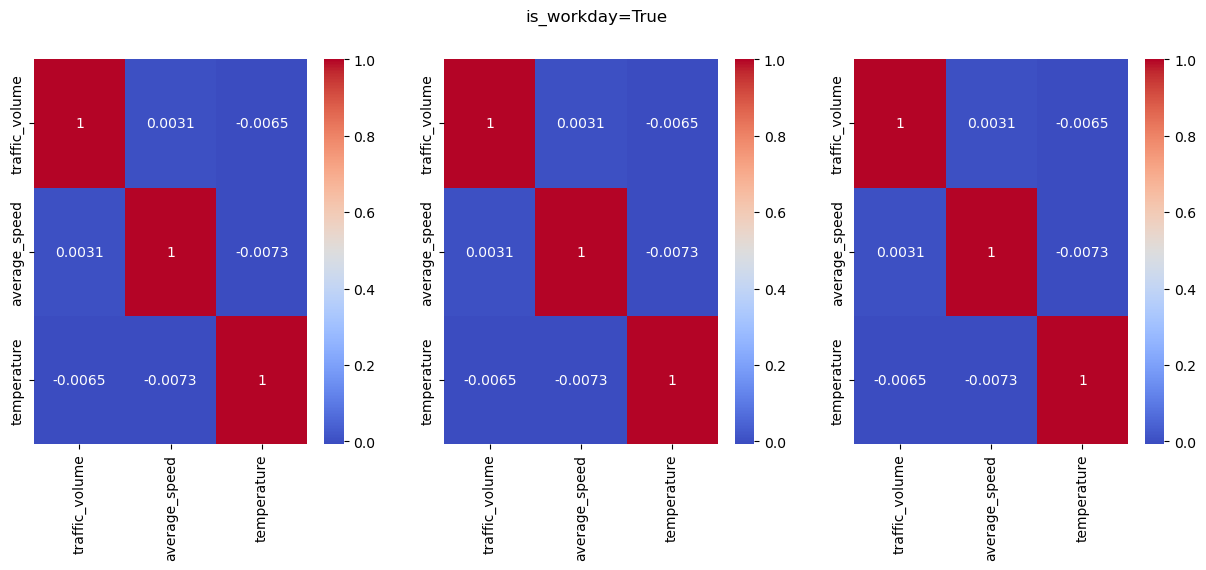

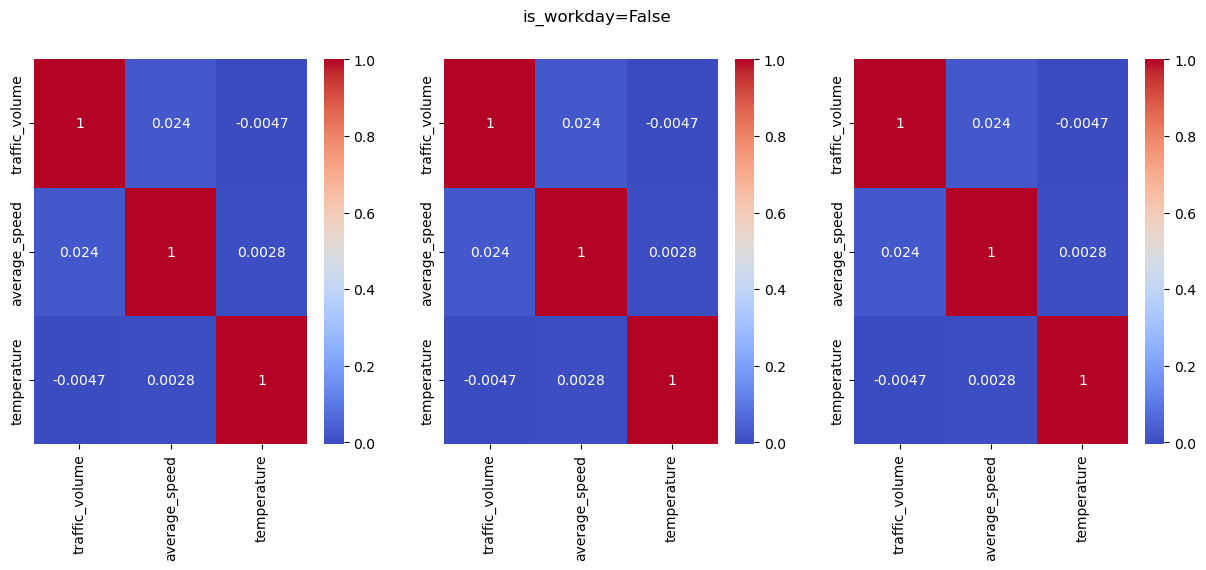

In [26]:
# constraint
for col in non_missing_columns:
    for val in df[col].unique():
        fig,axes = plt.subplots(1,3,figsize=(15,5))
        for i,m_col in enumerate(missing_columns):
            corr_matrix = df[df[col]==val][missing_columns].corr()
            sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',ax=axes[i])
        fig.suptitle(f'{col}={val}')
        plt.show()


## Missing Analysis

### overall analysis

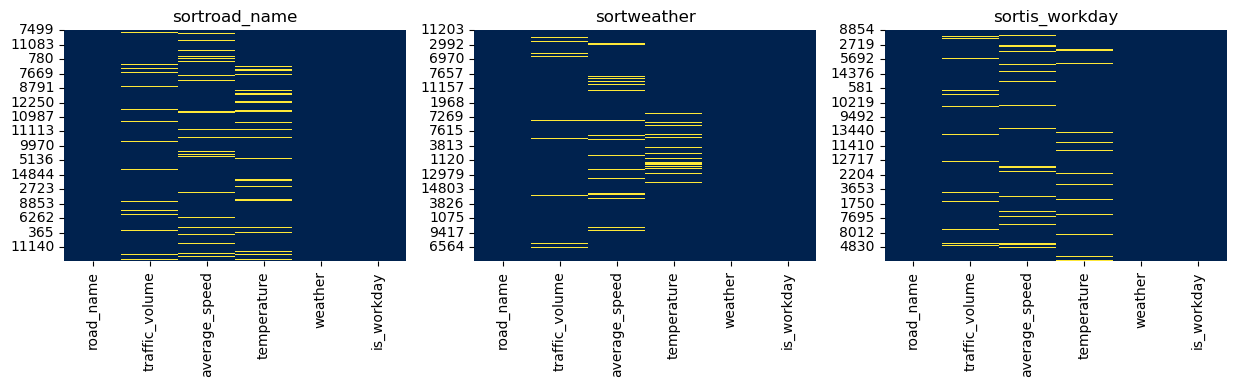

In [29]:
# overall
fig, axes = plt.subplots(1,3, figsize=(15,3))
for i,nm_col in enumerate(non_missing_columns):
    sns.heatmap(df.drop(columns=['datetime']).sort_values(by=[nm_col]).isnull(),cbar=False,
                cmap='cividis',ax=axes[i])
    axes[i].set_title(f'sort{nm_col}')
plt.show;

# MAR for temp for weather at some cases

- MAR for weather:temp

### missing analysis by categorical vars (constraint): heatmap

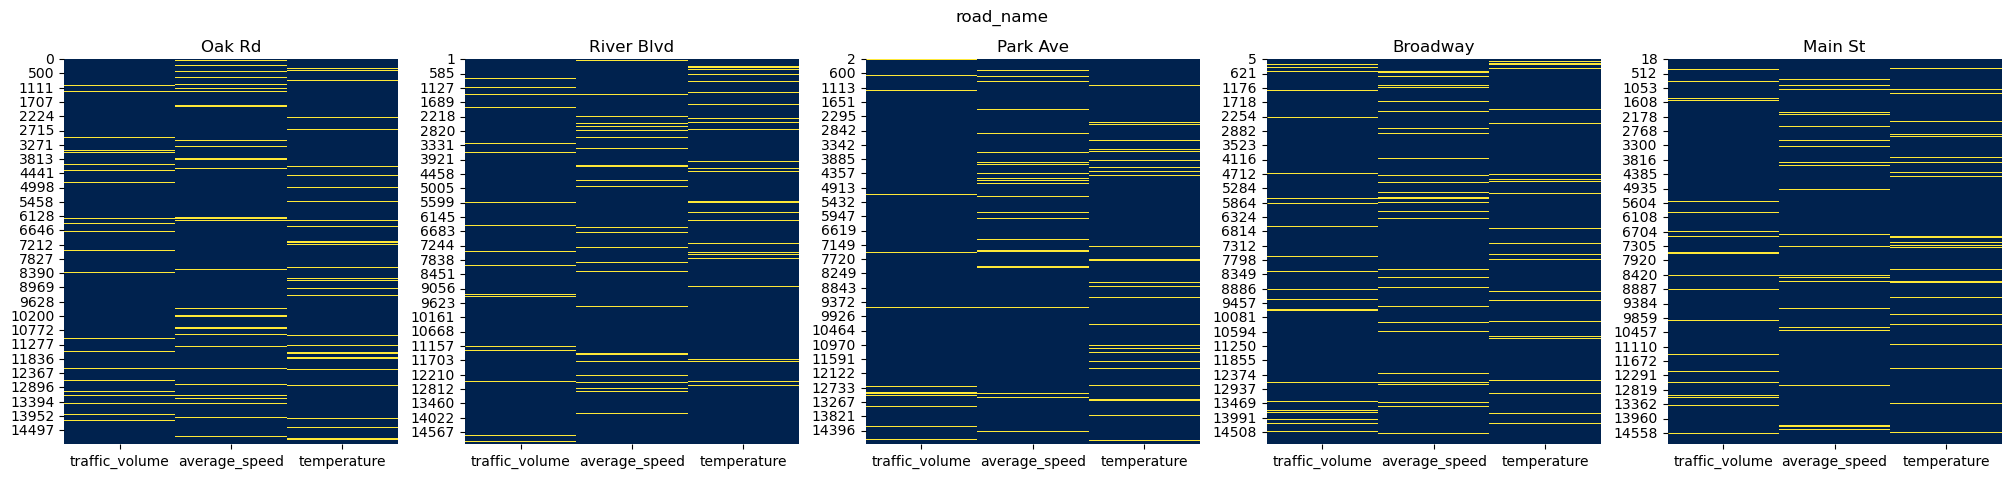

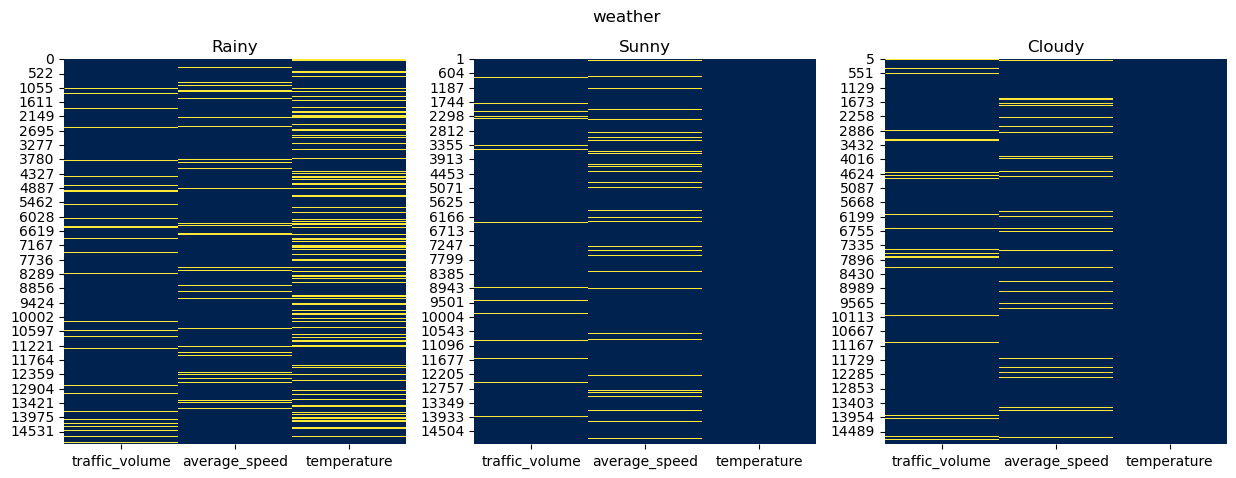

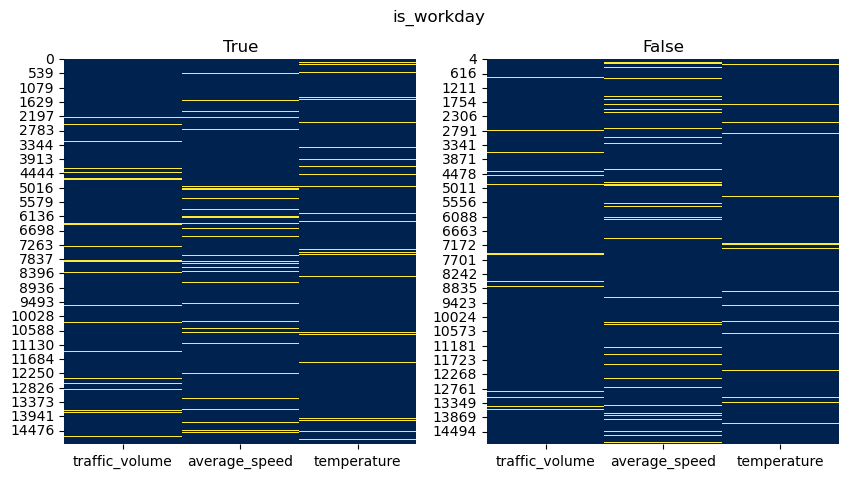

In [32]:
# constraint
for col in non_missing_columns:
    plt_column = len(df[col].unique())
    fig,axes=plt.subplots(1, plt_column, figsize=(5*plt_column,5))
    for i, val in enumerate(df[col].unique()):
        sns.heatmap(df[df[col]==val][missing_columns].isnull(),
                    cbar=False,cmap='cividis',ax=axes[i])
        axes[i].set_title(f'{val}')
    fig.suptitle(f'{col}')
    plt.show()

rainy>> temp

### missing analysis by categorical vars (constraint): kdeplot

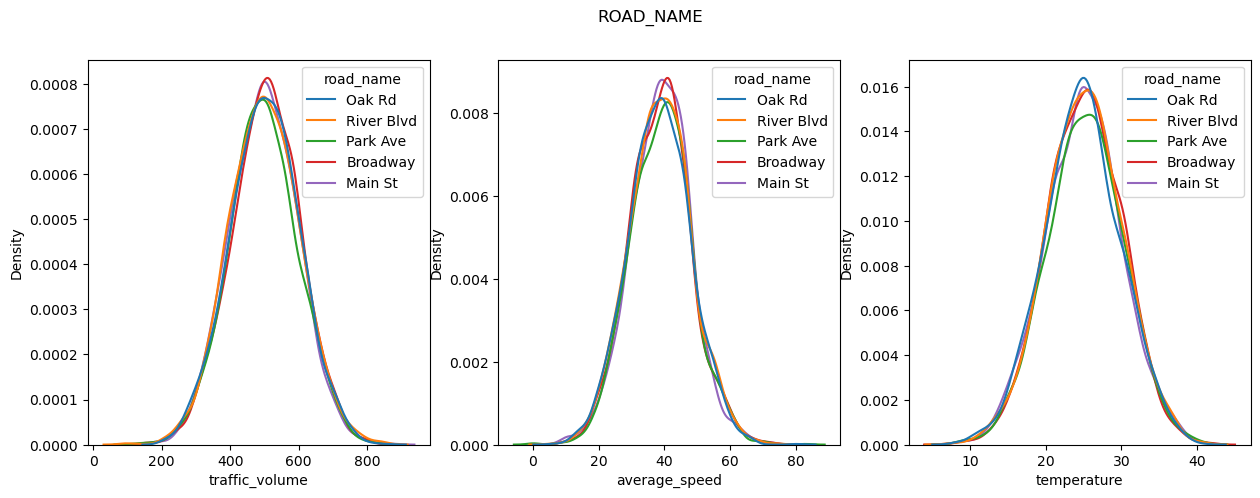

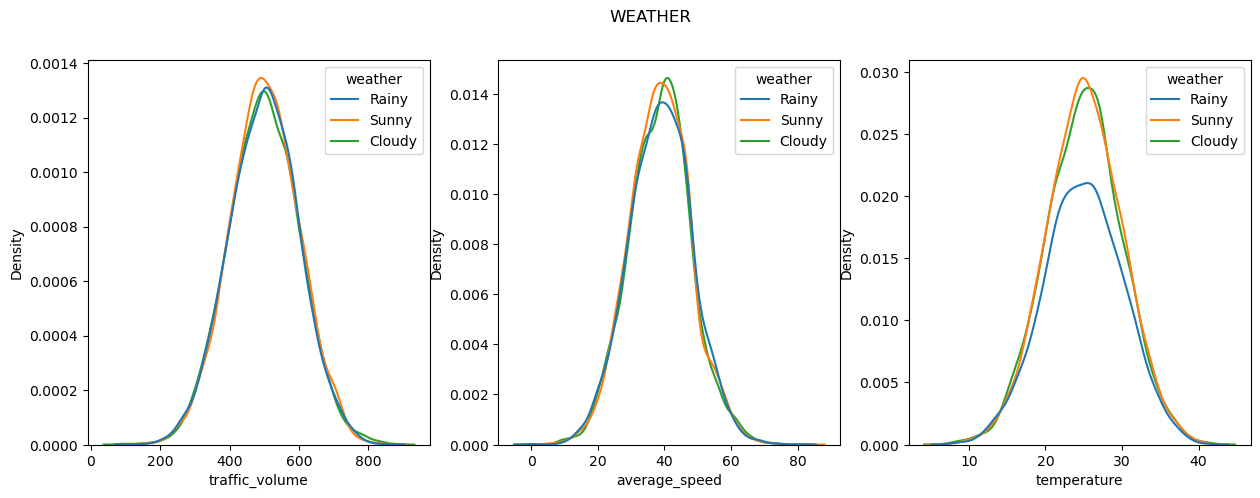

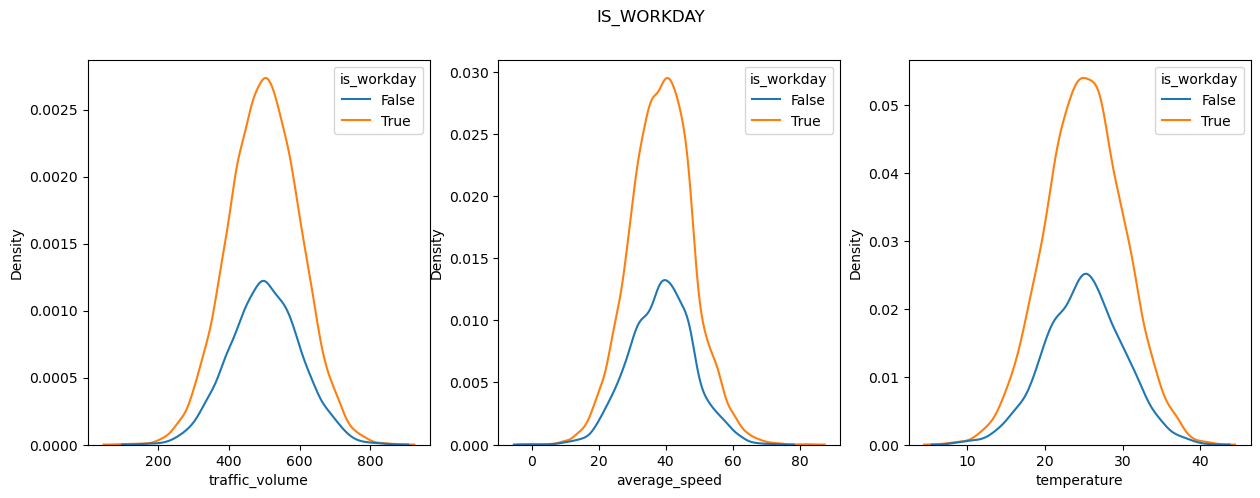

In [35]:
for nm_col in non_missing_columns:
    fig, axes= plt.subplots(1,3,figsize=(15,5))
    for i,m_col in enumerate(missing_columns):
        sns.kdeplot(data=df,x=m_col,hue=nm_col, ax=axes[i])
    fig.suptitle(f'{nm_col.upper()}')
    plt.show()

## Imputer

### Simple Imputer: median

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        15000 non-null  datetime64[ns]
 1   road_name       15000 non-null  object        
 2   traffic_volume  15000 non-null  float64       
 3   average_speed   15000 non-null  float64       
 4   temperature     15000 non-null  float64       
 5   weather         15000 non-null  object        
 6   is_workday      15000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 717.9+ KB


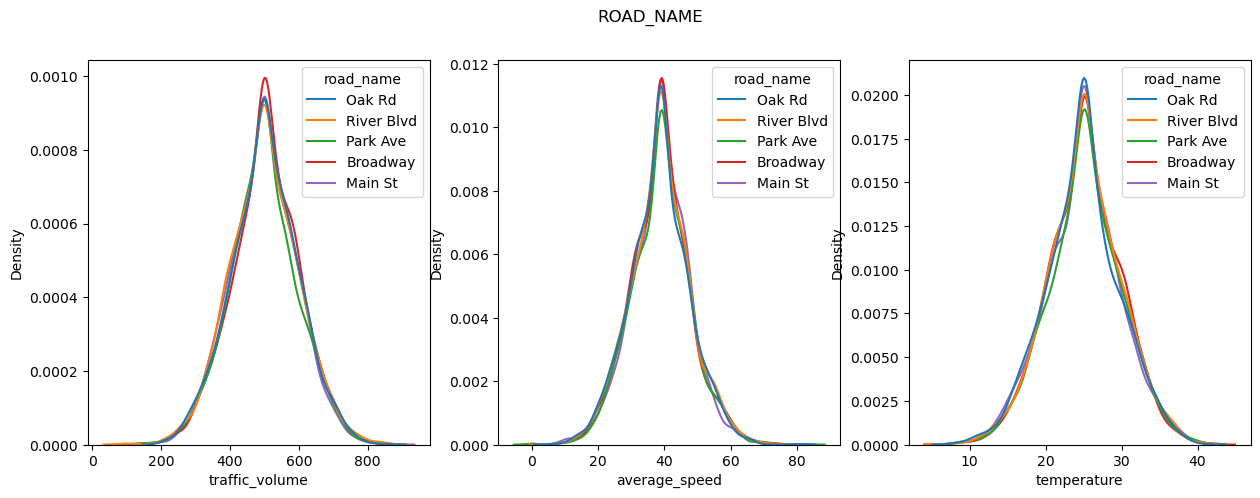

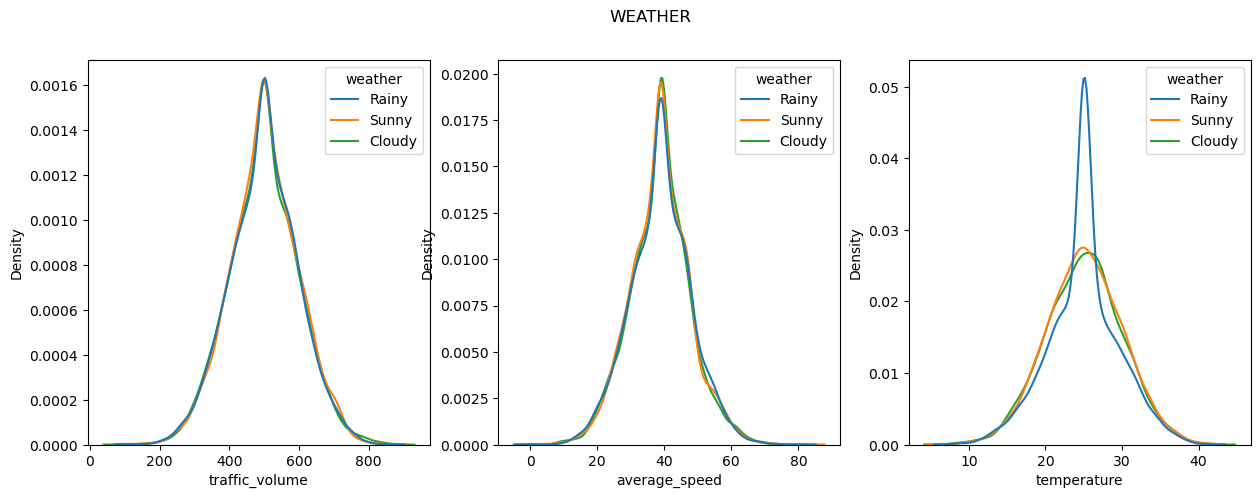

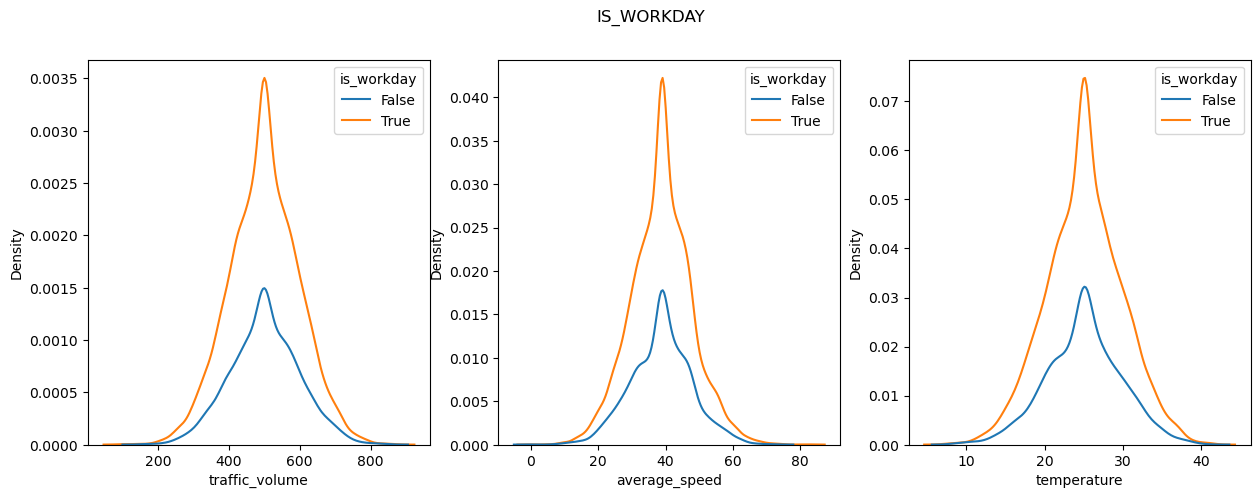

In [38]:
from sklearn.impute import SimpleImputer

df_imp = df.copy()
imputer = SimpleImputer(strategy='median')
df_imp[missing_columns]= imputer.fit_transform(df_imp[missing_columns])
df_imp.info()

for nm_col in non_missing_columns:
    fig, axes= plt.subplots(1,3,figsize=(15,5))
    for i,m_col in enumerate(missing_columns):
        sns.kdeplot(data=df_imp,x=m_col,hue=nm_col, ax=axes[i])
    fig.suptitle(f'{nm_col.upper()}')
    plt.show()

### Imputer: consider condition (bfill)
- date
- time

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        15000 non-null  datetime64[ns]
 1   road_name       15000 non-null  object        
 2   traffic_volume  15000 non-null  float64       
 3   average_speed   15000 non-null  float64       
 4   temperature     15000 non-null  float64       
 5   weather         15000 non-null  object        
 6   is_workday      15000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 717.9+ KB


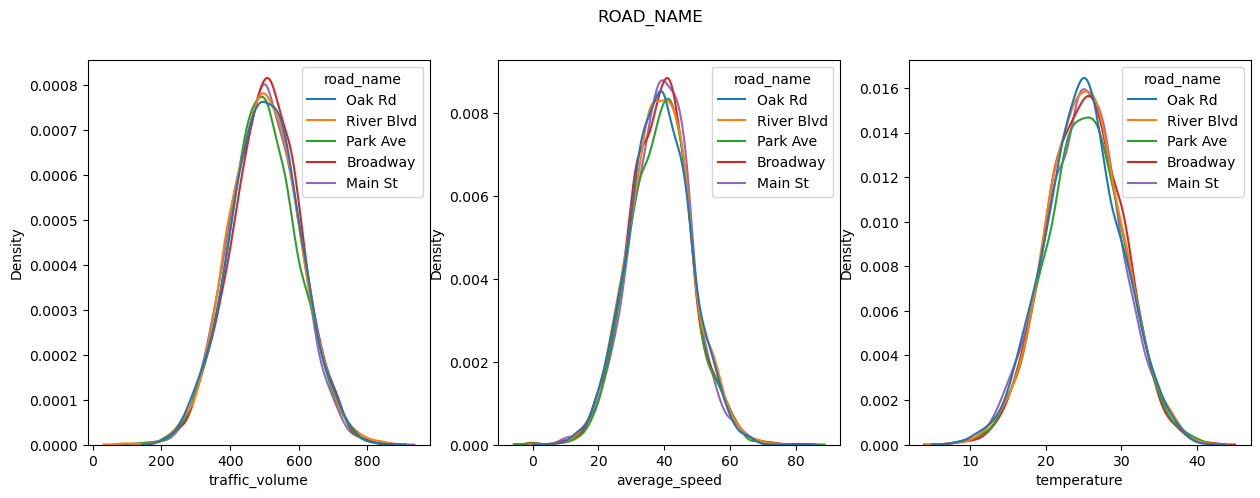

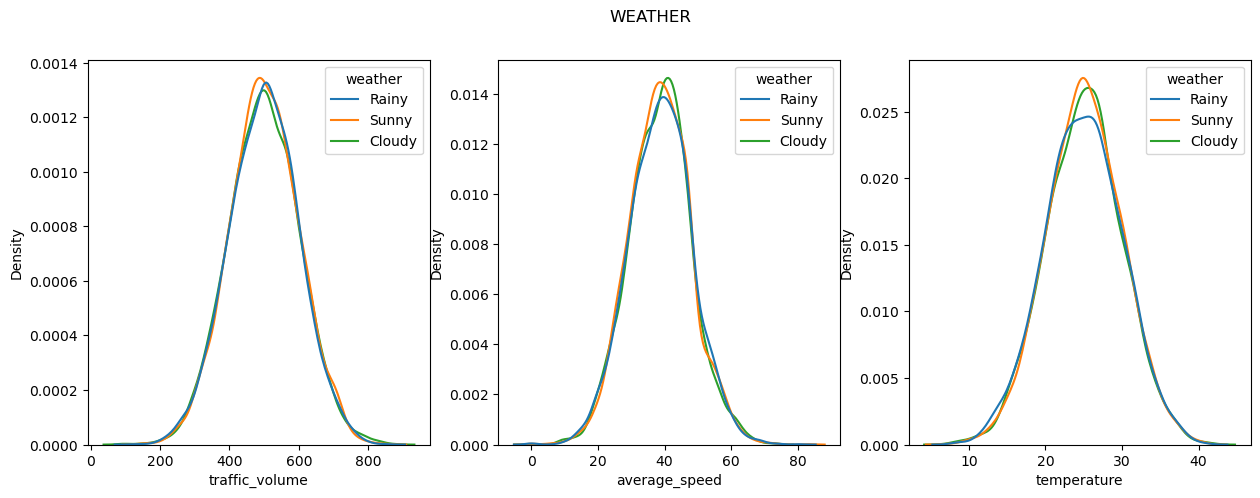

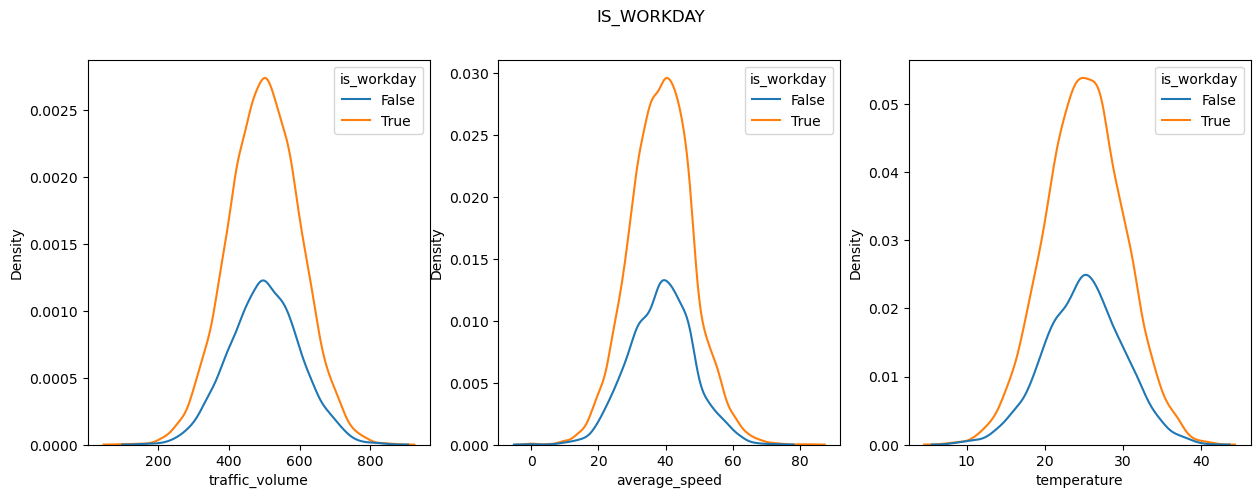

In [56]:
# impute by consider date,time

df_imp = df.copy()
df_imp.sort_values(by=['datetime'],inplace=True)
df_imp.bfill(inplace=True)
df_imp.info()

for nm_col in non_missing_columns:
    fig, axes= plt.subplots(1,3,figsize=(15,5))
    for i,m_col in enumerate(missing_columns):
        sns.kdeplot(data=df_imp,x=m_col,hue=nm_col, ax=axes[i])
    fig.suptitle(f'{nm_col.upper()}')
    plt.show()

Fill missing value

### Imputer: consider condition (customized fill)

C:\Users\khala\AppData\Local\Temp\ipykernel_15124\2507132985.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imp['traffic_volume'].bfill(inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        15000 non-null  datetime64[ns]
 1   road_name       15000 non-null  object        
 2   traffic_volume  15000 non-null  float64       
 3   average_speed   15000 non-null  float64       
 4   temperature     14998 non-null  float64       
 5   weather         15000 non-null  object        
 6   is_workday      15000 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(3), object(2)
memory usage: 717.9+ KB


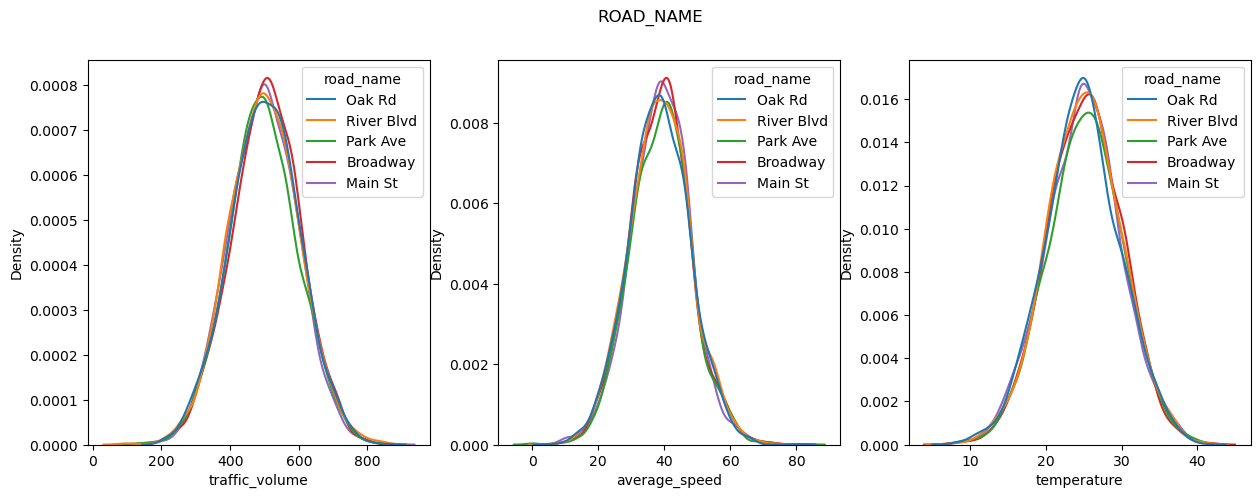

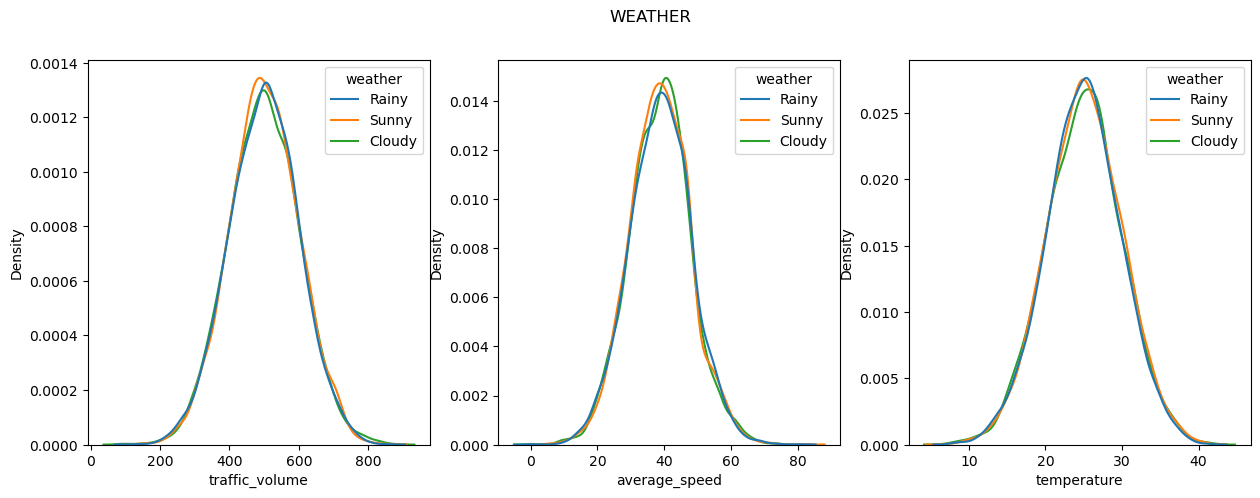

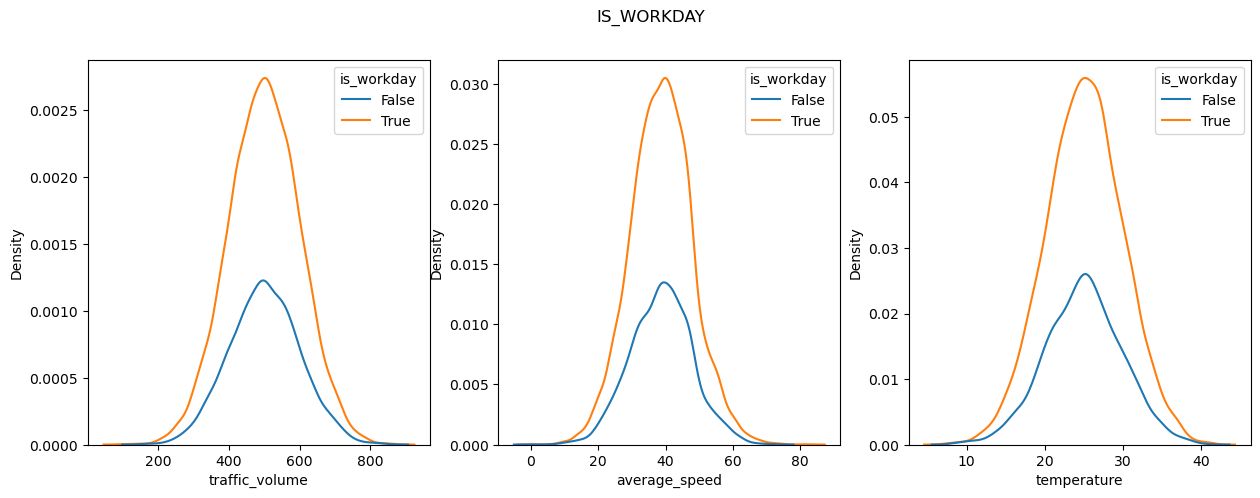

In [60]:
def forward_backward_mean_imputer(s):
    ffill =  s.ffill()
    bfill =  s.bfill()
    imputed = (ffill+bfill)/2
    return imputed


df_imp = df.copy()

# MCAR => traffic_volume : bfill
df_imp.sort_values(by=['datetime'],inplace=True)
df_imp['traffic_volume'].bfill(inplace=True)


# MAR => temperature
df_imp.loc[df_imp['weather']=='Rainy','temperature']=forward_backward_mean_imputer(
                                                        df_imp.loc[df_imp['weather']=='Rainy','temperature']
                                                            )
# note: first and last row not be treated, see 2 missing row in info below

# MNAR => average_speed
for name in  df_imp['road_name'].unique():
    df_avgspeed = df_imp.loc[df_imp['road_name']==name].copy()
    df_avgspeed.sort_values(by=['datetime','average_speed'], inplace=True)
    df_avgspeed['average_speed'] = forward_backward_mean_imputer(df_avgspeed['average_speed'])
    df_imp.loc[df_avgspeed.index,'average_speed'] = df_avgspeed['average_speed']



df_imp.info()

for nm_col in non_missing_columns:
    fig, axes= plt.subplots(1,3,figsize=(15,5))
    for i,m_col in enumerate(missing_columns):
        sns.kdeplot(data=df_imp,x=m_col,hue=nm_col, ax=axes[i])
    fig.suptitle(f'{nm_col.upper()}')
    plt.show()